In [46]:
import glob

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean

## Define locations

In [2]:
locations = {
    'Melrose': (-32.83, 138.19),
    'Tailem Bend': (-35.25, 139.47),
    'Kimba': (-33.16, 136.41),
}

In [3]:
lat_melrose, lon_melrose = locations['Melrose']
lat_tailem, lon_tailem = locations['Tailem Bend']
lat_kimba, lon_kimba = locations['Kimba']

## Read data

In [6]:
def drop_vars(ds):
    """Drop variables from dataset"""

    drop_vars = ['height', 'crs']
 
    for drop_var in drop_vars:
        try:
            ds = ds.drop(drop_var)
        except ValueError:
            pass

    return ds

In [9]:
infiles_c2 = sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUST-04/BOM/ERA5/historical/hres/BARRA-C2/v1/day/sfcWindmax/latest/sfcWindmax_AUST-04_ERA5_historical_hres_BOM_BARRA-C2_v1_day_*.nc'))
ds_c2 = xr.open_mfdataset(infiles_c2, preprocess=drop_vars)

In [10]:
ds_c2

<xarray.Dataset>
Dimensions:     (time: 16710, lat: 1018, lon: 1298, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 2024-09-30T12:0...
  * lon         (lon) float64 108.0 108.1 108.1 108.1 ... 159.8 159.9 159.9
  * lat         (lat) float64 -45.69 -45.65 -45.61 -45.57 ... -5.09 -5.05 -5.01
Dimensions without coordinates: bnds
Data variables:
    sfcWindmax  (time, lat, lon) float64 dask.array<chunksize=(31, 1018, 1298), meta=np.ndarray>
    time_bnds   (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Attributes: (12/60)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1D.json
    productive_version:        8935ea8
    variable_version:          v20240516
    Conventions:               CF-1.10, ACDD-1.3
    ...                        ...
    date_modified:             2024-10-11T00:15:48Z
    date_metadata_modified:    2024-10-11T00:15:48Z
    history:                   Wed Apr 24 07:28:15 2024: /g/data/access/ngm/m...
    references:                https://doi.org/10.25914/1x6g-2v48
    license:                   https://doi.org/10.25914/1x6g-2v48
    acknowledgement:           The production of BARRA2 was supported with fu...

In [4]:
infiles_r2 = sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/sfcWindmax/latest/sfcWindmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc'))

In [7]:
ds_r2 = xr.open_mfdataset(infiles_r2, preprocess=drop_vars)

In [8]:
ds_r2

<xarray.Dataset>
Dimensions:     (time: 16710, lat: 646, lon: 1082, bnds: 2)
Coordinates:
  * bnds        (bnds) float64 0.0 1.0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 2024-09-30T12:0...
  * lon         (lon) float64 88.48 88.59 88.7 88.81 ... 207.1 207.2 207.3 207.4
  * lat         (lat) float64 -57.97 -57.86 -57.75 -57.64 ... 12.76 12.87 12.98
Data variables:
    sfcWindmax  (time, lat, lon) float64 dask.array<chunksize=(31, 646, 1082), meta=np.ndarray>
    time_bnds   (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Attributes: (12/59)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1D.json
    productive_version:        edfab29
    variable_version:          v20231001
    Conventions:               CF-1.10, ACDD-1.3
    ...                        ...
    geospatial_lat_max:        12.98
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        88.48
    geospatial_lon_max:        207.39
    geospatial_lon_units:      degrees_east
    history:                   Sat May 04 16:03:34 2024: /g/data/access/ngm/m...

## Melrose, SA

September 28, 2016 (approx 3pm)

In [25]:
print(locations['Melrose'])

(-32.83, 138.19)


In [24]:
ds_c2['sfcWindmax'].sel({'lat': lat_melrose, 'lon': lon_melrose}, method="nearest")

<xarray.DataArray 'sfcWindmax' (time: 16710)>
dask.array<getitem, shape=(16710,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 2024-09-30T12:00:00
    lon      float64 138.2
    lat      float64 -32.81
Attributes:
    long_name:      Daily Maximum Near-Surface Wind Speed
    standard_name:  wind_speed
    units:          m s-1
    cell_methods:   time: maximum (interval: 1 hour) area: interpolation (met...
    grid_mapping:   crs

In [27]:
ds_r2['sfcWindmax'].sel({'lat': lat_melrose, 'lon': lon_melrose}, method="nearest")

<xarray.DataArray 'sfcWindmax' (time: 16710)>
dask.array<getitem, shape=(16710,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 2024-09-30T12:00:00
    lon      float64 138.2
    lat      float64 -32.78
Attributes:
    long_name:      Daily Maximum Near-Surface Wind Speed
    standard_name:  wind_speed
    units:          m s-1
    cell_methods:   time: maximum (interval: 1 hour) area: interpolation (met...
    grid_mapping:   crs

In [11]:
ds_melrose_c2 = ds_c2['sfcWindmax'].sel({'lat': lat_melrose, 'lon': lon_melrose}, method="nearest", drop=True)
ds_melrose_c2 = ds_melrose_c2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_melrose_c2 = ds_melrose_c2 * 3.6
ds_melrose_c2.attrs['units'] = 'km/hr'

In [16]:
ds_melrose_r2 = ds_r2['sfcWindmax'].sel({'lat': lat_melrose, 'lon': lon_melrose}, method="nearest", drop=True)
ds_melrose_r2 = ds_melrose_r2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_melrose_r2 = ds_melrose_r2 * 3.6
ds_melrose_r2.attrs['units'] = 'km/hr'

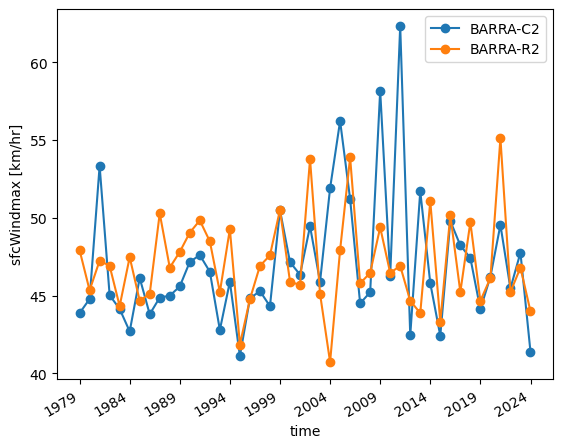

In [18]:
ds_melrose_c2.plot(marker='o', label='BARRA-C2')
ds_melrose_r2.plot(marker='o', label='BARRA-R2')
plt.title('Melrose')
plt.legend()
plt.show()

## Tailem Bend, SA

12 November 2022 approx 4pm

#### WXx

In [19]:
ds_tailem_c2 = ds_c2['sfcWindmax'].sel({'lat': lat_tailem, 'lon': lon_tailem}, method="nearest", drop=True)
ds_tailem_c2 = ds_tailem_c2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_tailem_c2 = ds_tailem_c2 * 3.6
ds_tailem_c2.attrs['units'] = 'km/hr'

In [20]:
ds_tailem_r2 = ds_r2['sfcWindmax'].sel({'lat': lat_tailem, 'lon': lon_tailem}, method="nearest", drop=True)
ds_tailem_r2 = ds_tailem_r2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_tailem_r2 = ds_tailem_r2 * 3.6
ds_tailem_r2.attrs['units'] = 'km/hr'

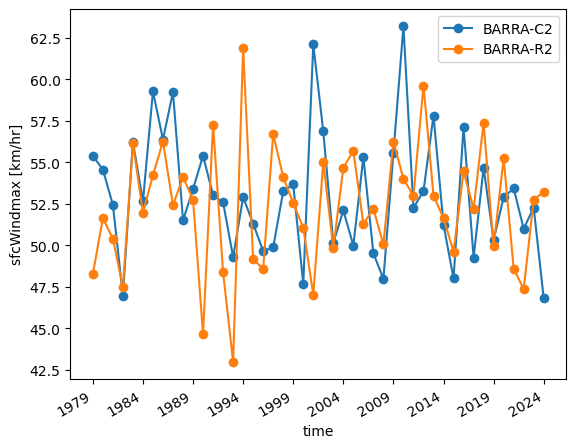

In [21]:
ds_tailem_c2.plot(marker='o', label='BARRA-C2')
ds_tailem_r2.plot(marker='o', label='BARRA-R2')
plt.title('Tailem Bend')
plt.legend()
plt.show()

#### Hourly

In [36]:
hrfile = '/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/1hr/sfcWind/v20240809/sfcWind_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_1hr_202211-202211.nc'

In [37]:
ds_r2_hr = xr.open_dataset(hrfile)

In [56]:
time_selection = ds_r2_hr['sfcWind'].sel(time=slice('2022-11-12', '2022-11-12')) * 3.6
time_selection.attrs['units'] = 'km/hr'

In [57]:
time_selection = time_selection.compute()

In [64]:
def plot_towns(ax, label_color='white'):    
    lats = [-32.83, -35.25, -33.16]
    lons = [138.19, 139.47, 136.41]
    towns = ['Melrose', 'Tailem Bend', 'Kimba']
    offsets = {'Melrose': 0.3, 'Tailem Bend': 0.3, 'Kimba': -3.4}
    for lon, lat, town in zip(lons, lats, towns):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(
            lon + offsets[town],
            lat,
            town,
            fontsize='large',
            color=label_color,
            transform=ccrs.PlateCarree()
        )

/jobfs/136599207.gadi-pbs/ipykernel_2593854/4155684810.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


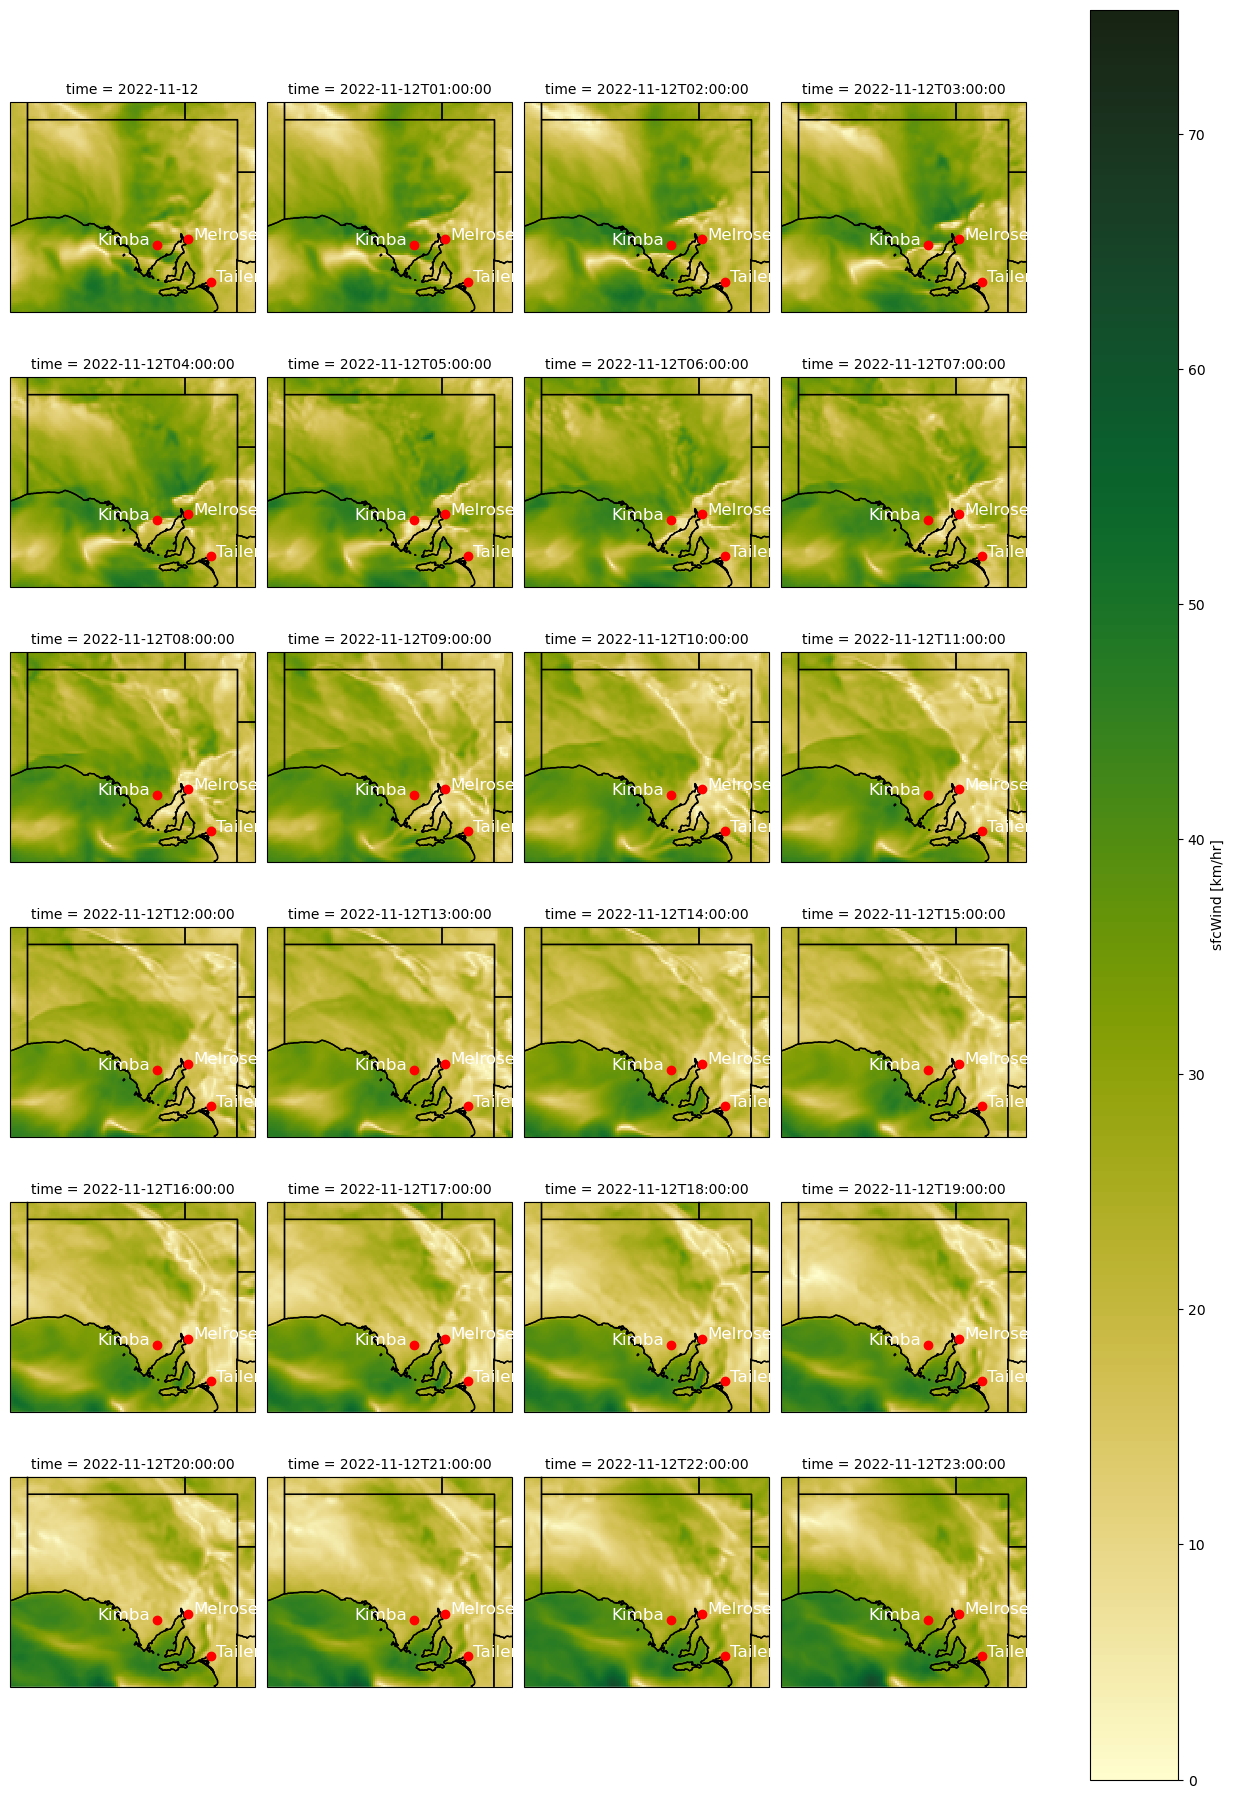

In [65]:
p = time_selection.plot(
    col='time',
    col_wrap=4,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.speed,
#    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    plot_towns(ax)
    ax.set_extent([128, 142, -25, -37], crs=ccrs.PlateCarree())

## Kimba, SA

17 October 2024, approx 5:30pm.

About 20km south of Kimba. 

Winds noted up to 130km/hr in Roxby Downs.

In [31]:
ds_kimba_c2 = ds_c2['sfcWindmax'].sel({'lat': lat_kimba, 'lon': lon_kimba}, method="nearest", drop=True)
ds_kimba_c2 = ds_kimba_c2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_kimba_c2 = ds_kimba_c2 * 3.6
ds_kimba_c2.attrs['units'] = 'km/hr'

In [32]:
ds_kimba_r2 = ds_r2['sfcWindmax'].sel({'lat': lat_kimba, 'lon': lon_kimba}, method="nearest", drop=True)
ds_kimba_r2 = ds_kimba_r2.resample(time='Y').max(dim='time', keep_attrs=True).compute()
ds_kimba_r2 = ds_kimba_r2 * 3.6
ds_kimba_r2.attrs['units'] = 'km/hr'

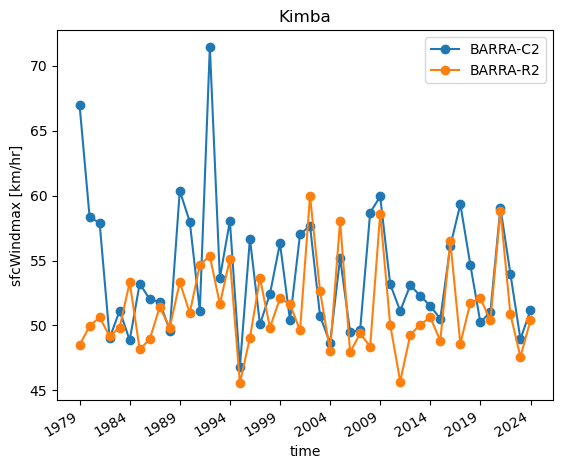

In [33]:
ds_kimba_c2.plot(marker='o', label='BARRA-C2')
ds_kimba_r2.plot(marker='o', label='BARRA-R2')
plt.title('Kimba')
plt.legend()
plt.show()

In [34]:
infiles_r2[-1]

'/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/sfcWindmax/latest/sfcWindmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_202409-202409.nc'

In [35]:
infiles_c2[-1]

'/g/data/ob53/BARRA2/output/reanalysis/AUST-04/BOM/ERA5/historical/hres/BARRA-C2/v1/day/sfcWindmax/latest/sfcWindmax_AUST-04_ERA5_historical_hres_BOM_BARRA-C2_v1_day_202409-202409.nc'

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 7))
#ax.plot
#plt.show()